In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from vizman import viz
import matplotlib.pyplot as plt

import seaborn as sns
import pandas as pd
import numpy as np

default_things: str = "../Pyvizman/vizman/"
default_colors: dict = viz.load_data_from_json(default_things + "colors.json")

viz.set_visual_style(
    json_color_path=default_things + "colors.json", change_colors=False
)


In [3]:
network_type:str = "binary" # binary or weighted

In [4]:
scalability_dataset_path: str = f"datasets/{network_type}/scalability/"
dataset:list = np.load(scalability_dataset_path + "operation_times_corrected.pkl", allow_pickle=True)


In [5]:
densities:list = [0.1, 0.2, 0.3, 0.4, 0.5]
sizes:list = [128, 256, 512, 1024, 2048]
reciprocities:list = [str(i/10) for i in range(11)]
density_list:list = []
size_list:list = []

for density in densities:
    for size in sizes:
        density_list.extend([density] * 50)
        size_list.extend([size] * 50)

In [6]:
scalability_df:pd.DataFrame = pd.DataFrame(dataset, columns=[f'{i}' for i in range(11)])
scalability_df['density'] = density_list
scalability_df['size'] = size_list

scalability_df = scalability_df.melt(id_vars=['density', 'size'], var_name='reciprocity', value_name='operation_time')

scalability_df['reciprocity'] = pd.Categorical(scalability_df['reciprocity'], 
                                               categories=[str(i) for i in range(11)], 
                                               ordered=True)

scalability_df.sort_values(by=['reciprocity','size'], ascending=[True, True],inplace=True)
scalability_over_size:pd.DataFrame = scalability_df[scalability_df['density'] == 0.1]
scalability_over_density:pd.DataFrame = scalability_df[scalability_df['size'] == 256]


In [7]:
reciprocity_colors = sns.blend_palette(
    [
        default_colors["warms"]["SAND"],
        default_colors["warms"]["LECKER_RED"],
        default_colors["warms"]["DEEP_RED"],
    ],n_colors=11
)
reciprocity_colors

[(np.float64(0.8823529411764706),
  np.float64(0.7725490196078432),
  np.float64(0.6352941176470588)),
 (np.float64(0.8877354863514033),
  np.float64(0.6748942714340639),
  np.float64(0.5745482506728181)),
 (np.float64(0.8933333333333333),
  np.float64(0.5733333333333334),
  np.float64(0.5113725490196078)),
 (np.float64(0.8987158785082661),
  np.float64(0.475678585159554),
  np.float64(0.45062668204536716)),
 (np.float64(0.9043137254901961),
  np.float64(0.37411764705882355),
  np.float64(0.38745098039215686)),
 (np.float64(0.9091733948481353),
  np.float64(0.27343329488658213),
  np.float64(0.32518262206843523)),
 (np.float64(0.8776470588235294),
  np.float64(0.21960784313725493),
  np.float64(0.30980392156862746)),
 (np.float64(0.8448596693579392),
  np.float64(0.16362937331795463),
  np.float64(0.2938100730488274)),
 (np.float64(0.8133333333333334),
  np.float64(0.10980392156862748),
  np.float64(0.2784313725490196)),
 (np.float64(0.7805459438677431),
  np.float64(0.05382545174932718),
  np.float64(0.26243752402921955)),
 (np.float64(0.7490196078431373),
  np.float64(0.0),
  np.float64(0.24705882352941178))]

In [8]:
density_colors = sns.blend_palette(
    [
        default_colors["neutrals"]["GRAY"],
        default_colors["colds"]["LAKE_BLUE"],
        default_colors["colds"]["DEEP_BLUE"],
    ],n_colors=5
)
density_colors

[(np.float64(0.7215686274509804),
  np.float64(0.7215686274509804),
  np.float64(0.7215686274509804)),
 (np.float64(0.4833833141099577),
  np.float64(0.6841676278354479),
  np.float64(0.7451903114186852)),
 (np.float64(0.24608996539792388),
  np.float64(0.646089965397924),
  np.float64(0.7676585928489044)),
 (np.float64(0.12207612456747406),
  np.float64(0.5220761245674741),
  np.float64(0.6436447520184545)),
 (np.float64(0.0), np.float64(0.4), np.float64(0.5215686274509804))]

In [9]:
size_colors = sns.blend_palette(
    [
        default_colors["neutrals"]["GRAY"],
        default_colors["purples"]["PURPLE"],
        default_colors["purples"]["PURPLER"],
    ],n_colors=5
)
size_colors

[(np.float64(0.7215686274509804),
  np.float64(0.7215686274509804),
  np.float64(0.7215686274509804)),
 (np.float64(0.6861361014994233),
  np.float64(0.5325951557093426),
  np.float64(0.6034602076124568)),
 (np.float64(0.6497962322183776),
  np.float64(0.3440061514801999),
  np.float64(0.48565936178392927)),
 (np.float64(0.4982237600922722),
  np.float64(0.20424452133794693),
  np.float64(0.4069204152249135)),
 (np.float64(0.34901960784313724),
  np.float64(0.06666666666666667),
  np.float64(0.32941176470588235))]

/var/folders/jj/cg03q6f13lb9h32fwmdrmzrm0000gp/T/ipykernel_97088/3189123928.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes['D'].set_xticklabels(reciprocities)


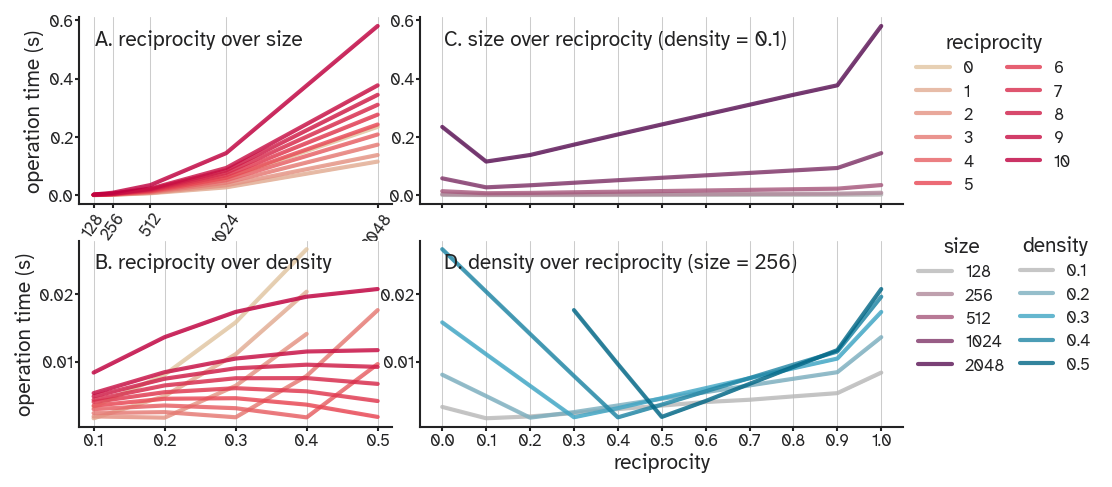

In [10]:
fig, axes = plt.subplot_mosaic([["A","A", "C", "C", "C"],
                                ["B","B", "D", "D", "D"]],sharey=False,
                               figsize=viz.cm_to_inch([18,9]),
                               dpi=150)
sns.lineplot(data=scalability_over_size, x='size', y='operation_time', hue='reciprocity',
             palette=reciprocity_colors,errorbar=('ci', False),ax=axes['A'],lw=2,alpha=0.8)
sns.lineplot(data=scalability_over_density, x='density', y='operation_time', hue='reciprocity',
             palette=reciprocity_colors,errorbar=('ci', False),ax=axes['B'],legend=False,lw=2,alpha=0.8)

sns.lineplot(data=scalability_over_size, x='reciprocity', y='operation_time', hue='size',
             palette=size_colors,errorbar=('ci', False),ax=axes['C'],lw=2,alpha=0.8)
sns.lineplot(data=scalability_over_density, x='reciprocity', y='operation_time', hue='density',
             palette=density_colors,errorbar=('ci', False),ax=axes['D'],lw=2,alpha=0.8)

sns.move_legend(axes['A'],loc="upper left",bbox_to_anchor=(2.63, 1),frameon=False,ncols=2)
sns.move_legend(axes['C'],loc="upper left",bbox_to_anchor=(1, -0.1),frameon=False,ncols=1)
sns.move_legend(axes['D'],loc="upper left",bbox_to_anchor=(1.21, 1.11),frameon=False,ncols=1)

axes['A'].annotate('A. reciprocity over size', xy=(0.05, 0.85), xycoords="axes fraction")
axes['B'].annotate('B. reciprocity over density', xy=(0.05, 0.85), xycoords="axes fraction")
axes['C'].annotate('C. size over reciprocity (density = 0.1)', xy=(0.05, 0.85), xycoords="axes fraction")
axes['D'].annotate('D. density over reciprocity (size = 256)', xy=(0.05, 0.85), xycoords="axes fraction")

axes['A'].set_xticks(sizes)
axes['A'].set_xticklabels(rotation=55, labels=sizes)
axes['A'].set_xlabel('')
axes['A'].set_ylabel('operation time (s)')

axes['B'].set_xticks(densities)
axes['B'].set_xlabel('')
axes['B'].set_ylabel('operation time (s)')

axes['C'].set_xticklabels([])
axes['C'].set_xlabel('')
axes['C'].set_ylabel('')

axes['D'].set_xticklabels(reciprocities)
axes['D'].set_ylabel('')

axes['A'].grid(axis='x', linewidth=0.5)
axes['B'].grid(axis='x', linewidth=0.5)
axes['C'].grid(axis='x', linewidth=0.5)
axes['D'].grid(axis='x', linewidth=0.5)

sns.despine(fig=fig)
plt.savefig(f"figures/{network_type}/scalability.pdf",bbox_inches='tight',transparent=True, dpi=600)